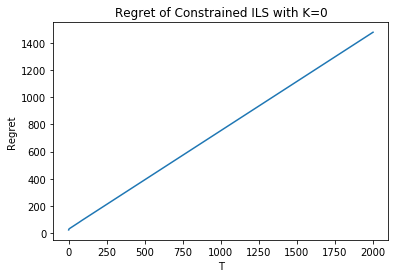

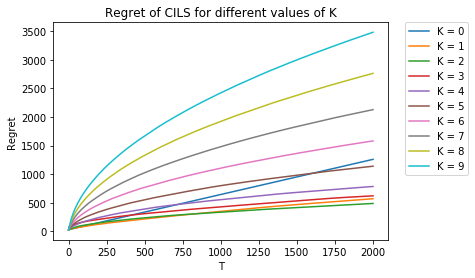

In [47]:
import random
import matplotlib.pyplot as plt
import numpy as np

#Question (a):

'''
GILS implements the greedy iterated least squares price policy.
The INPUTS are as follows:

1) b_1, b_2, b_3, b_4 (floats): the bounds for the paramaters of the demand function, i.e.
0 <= b_1 <= theta_1 <= b_2 AND b_3 <= theta_3 <= b_4 <= 0.

2) min_p, max_p (floats): the bounds for the true price.

3) t (int): time stamp.

3) h (array of 2-tuples): the history of prices and demands up to time t. Namely:
h = [(p_1,d_1); (p_2,d_2); . . . ; (p_t,d_t)].

The OUTPUT is p_{t+1} (int), the price chosen by GILS for the next time stamp.
'''

def GILS(b_1, b_2, b_3, b_4, min_p, max_p, t, h):
    
    # We fix arbitrary initial prices p_1 and p_2.
    if t==0:
        return 17
    if t==1:
        return 7
    
    # If t>1, compute the least squares estimator (theta_1, theta_2).
    # We use the usual solution for ls estimator in linear regression.
    prices = [h[i][0] for i in range(t)]
    demands = [h[i][1] for i in range(t)]
    prod = [prices[i]*demands[i] for i in range(t)]
    pric_squar = [prices[i]*prices[i] for i in range(t)]
    
    theta_2 = (sum(prod) - (sum(prices)*sum(demands))/t)/(sum(pric_squar) - sum(prices)*sum(prices)/t)
    theta_1 = sum(demands)/t - theta_2*sum(prices)/t
    
    # Project them onto [b_1,b_2] x [b_3,b_4] if necessary
    if theta_1 < b_1:
        theta_1 = b_1
    if theta_1 > b_2:
        theta_1 = b_2
    if theta_2 < b_3:
        theta_2 = b_3
    if theta_2 > b_4:
        theta_2 = b_4
    
    # Return the perceived optimal price (assuming it will fall into [min_p, max_p])
    return -theta_1/(2*theta_2)


"""
Sign function determines the sign of a float.
If the float is greater or equal than 0 the return equals 1,
otherwise the return equals -1.
"""

def Sign(x):
    if x >= 0:
        return 1
    else:
        return -1
'''
CILS implements the constrained iterated least squares price policy. The INPUTS are
the same as for GILS with the threshold paramter K (float) added. OUTPUT is also p_{t+1}
'''

def CILS(b_1, b_2, b_3, b_4, min_p, max_p, t, h, K):
    
    #  Calculate the unconstrained price. 
    U_price = GILS(b_1, b_2, b_3, b_4, min_p, max_p, t, h)
    # Calculate the average of the prices up till time t
    A_price = 0
    if t > 0:
        for history in h:
            A_price += history[0]/(t)
    
    # Calculate  delta_t
    delta_t = U_price  - A_price
    
    # Calculate the constrained price
    if abs(delta_t) < K*((t+1)**(-1/4)):
        return A_price + Sign(delta_t)*K*((t+1)**(-1/4))
    else:
        return U_price

'''
Let us now fix b_1 = 0.01, b_2 = 1000, b_3 = -500, b_4 = -0.01, min_p = 0, max_p = 50.
And also that the true theta_1 = 10 and theta_2 = -0.5 so that D = 10 - 0.5*p.
'''
    
#Questions (b) and (c):

'''
REGRET_fixed_K(K, T, theta_1, theta_2) computes all the regrets for CILS(K) up to time T for 
true paramters theta_1, theta_2 fixed, and parameter K. 
n is the number of trials over which the regret function is averaged.
'''

def REGRET_fixed_K(K, T, theta_1, theta_2, n):
    best_p = -theta_1/(2*theta_2) # the best price in hindsight
    all_trials = []
    for i in range(n): # We average our result over n trials
        regrets = [] 
        h = []
        regret = 0
        for t in range(T):
            e_t = np.random.normal(0,1) # We assume the epsilon error at time t to be N(0,1) distributed.
            p_t = CILS(0.01,1000,-500,-0.01,0,50, t, h, K)
            d_t = theta_1 + theta_2*p_t +e_t
            regret += best_p*(theta_1 + theta_2*best_p) - p_t*(d_t-e_t)
            h.append((p_t,d_t))
            regrets.append(regret)
        all_trials.append(regrets)
    return [sum([all_trials[i][t] for i in range(n)])/n for t in range(T)]

def main():
    
    # Question (b)
    
    '''
    We compute the regret of CILS(0) for T = 1 to T = 1000. We then plot it against time 
    to assess its linear behavior.
    '''
    
    # Computation.
    time_max = 2000
    time = [t+1 for t in range(time_max)]
    regrets = []
    regrets = REGRET_fixed_K(0, time_max, 10, -0.5,100)
    
    # PLOT.
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(time,regrets)
    axes.set_xlabel('T')
    axes.set_ylabel('Regret')
    axes.set_title('Regret of Constrained ILS with K=0')
    plt.show() 
    
    # Question (c)
   
    '''
    We compare the behavior of the regrets of CILS(k) for a smaller range of k.
    We then plot each regret function against time on the same graph to compare their asymptotic behavior,
    and determine for which CILS(k) is better for values of T.
    ''' 
    
    k_max = 10 # Computing for k = 0, 1, ..., 9
    time_max = 2000
    time = [t+1 for t in range(time_max)]
    regrets_k = [] 
    for k in range(k_max):
        regrets_k.append(REGRET_fixed_K(k, time_max, 10, -0.5,100)) 
        
    # PLOT.
    figx = plt.figure() 
    axes = figx.add_subplot(111)
    axes.set_xlabel('T')  
    axes.set_ylabel('Regret')
    axes.set_title('Regret of CILS for different values of K')
  
    for k in range(k_max):
        axes.plot(time,regrets_k[k],label = "K = " + str(k))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()        
      
if __name__ == '__main__':
    main()
